In [14]:
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Reading the csv file
df = pd.read_csv('imdb_master.csv',encoding='latin-1')
sentences = df['review'].values
y = df['label'].values
print(df.label.value_counts())

#tokenizing data
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)

#getting the vocabulary of data
sentences = tokenizer.texts_to_matrix(sentences)

#Label Encoder
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

# Number of features
# print(input_dim)
model = Sequential()
model.add(layers.Dense(300,input_dim=2000, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

[test_loss, test_acc] = model.evaluate(X_test,y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

unsup    50000
neg      25000
pos      25000
Name: label, dtype: int64
Epoch 1/5
293/293 [==============================] - 3s 11ms/step - loss: 0.8788 - acc: 0.5061 - val_loss: 0.8457 - val_acc: 0.5157
Epoch 2/5
293/293 [==============================] - 3s 10ms/step - loss: 0.7895 - acc: 0.5785 - val_loss: 0.8422 - val_acc: 0.5154
Epoch 3/5
293/293 [==============================] - 3s 10ms/step - loss: 0.6882 - acc: 0.6768 - val_loss: 0.8744 - val_acc: 0.5131
Epoch 4/5
293/293 [==============================] - 3s 11ms/step - loss: 0.5037 - acc: 0.8089 - val_loss: 0.9495 - val_acc: 0.5109
Epoch 5/5
782/782 [==============================] - 1s 2ms/step - loss: 1.0573 - acc: 0.5078
Evaluation result on Test Data : Loss = 1.0572593212127686, accuracy = 0.5077599883079529


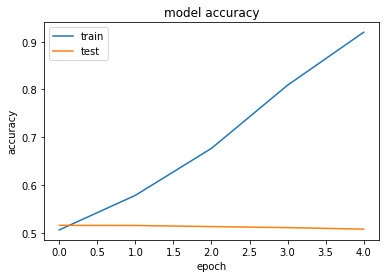

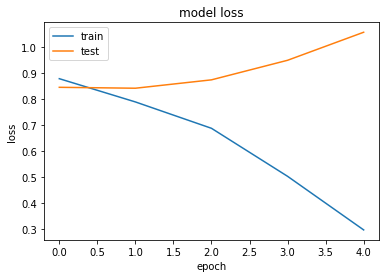

In [15]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
#Checking Sample Data and Predicted Data
predict_classe = model.predict_classes(X_test[[5],:])
print("Predicted value:",predict_classe[0])
print("Actual value:",y_test[5])

Predicted value: 2
Actual value: 2
